In [7]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from utils import read_data
import seaborn as sns
import pandas as pd

In [8]:
params = {
    "set1": {"mode": "TEST", "modelName": "p1", "folderName": "2024-01-05-13-36-12"}
}

param = "set1"

In [9]:
modelName = params[param]["modelName"]
mode = params[param]["mode"]
folderName = params[param]["folderName"]

In [10]:
if mode == "TRAIN":
    sourceFolder = "o7_analyze_train"
elif mode == "TEST":
    sourceFolder = "o7_analyze_test"
else:
    raise ValueError("Unknown mode")
sourceFolder = os.path.join(sourceFolder, modelName)

In [11]:
cwd = sys.path[0]
outputFolderPath = os.path.join(cwd, sourceFolder)
folderPath = os.path.join(outputFolderPath, folderName)
data_pickle, data_json = read_data(folderPath)

X_pred = data_pickle["X_pred"]
X_true = data_pickle["X_true"]
tArrayPred = data_pickle["tArrayPred"]
mseArray = data_pickle["mseArray"]
dx = data_json["s2"]["dx"]
L = data_json["s2"]["L"]

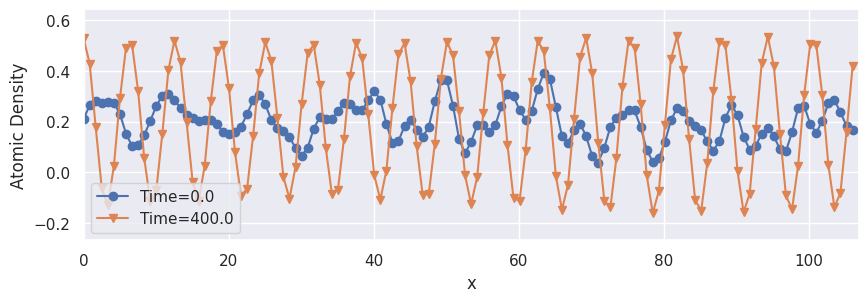

In [12]:
sns.set_theme()
filenamePrefix = "phi-profile"

minV = X_true[-1, :].min()
maxV = X_true[-1, :].max()
minV = minV - abs(maxV) * 0.2
maxV = maxV + abs(maxV) * 0.2
xp = np.arange(0, L, dx)

markerTypes = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

nFig = 2
idxTSample = np.floor(np.linspace(0, tArrayPred.shape[0] - 1, nFig)).astype(int)
fig, ax = plt.subplots(figsize=(10, 3))
for idx, t in enumerate(idxTSample):
    tTime = tArrayPred[t]
    ax.plot(xp, X_true[t, :], marker=markerTypes[idx], label=f"Time={tTime:3.1f}")
    ax.set_ylim([minV, maxV])
    ax.set_xlabel("x")
    ax.set_ylabel("Atomic Density")
    ax.set_xlim([0, L])
    plt.legend()

tTimeFmt = f'{tTime:2.1f}'.replace(".","_")
filename = f'{filenamePrefix}-{modelName}.png'
filePath = os.path.join(os.getcwd(), 'o8_visualize', filename)
plt.savefig(filePath, dpi=300, bbox_inches="tight")